In [1]:
import pandas as pd
df = pd.read_csv('train_data.csv')
df.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000,0,-3504386,0,ken.rice@enron.com,19794175,46950,18,42,...,1617011,174839,True,2748364,0,420636,864,905,505050,22542539
1,SKILLING JEFFREY K,5600000,0,0,0,jeff.skilling@enron.com,19250000,29336,108,88,...,1920000,22122,True,6843672,0,1111258,2042,3627,8682716,26093672
2,SHELBY REX,200000,0,-4167,0,rex.shelby@enron.com,1624396,22884,39,13,...,0,1573324,True,869220,0,211844,91,225,2003885,2493616
3,KOPPER MICHAEL J,800000,0,0,0,michael.kopper@enron.com,0,118134,0,0,...,602671,907502,True,985032,0,224305,0,0,2652612,985032
4,CALGER CHRISTOPHER F,1250000,0,-262500,0,christopher.calger@enron.com,0,35818,144,199,...,375304,486,True,126027,0,240189,2188,2598,1639297,126027


In [2]:
features = df.columns
print(features)
#features=['exercised_stock_options','total_stock_value','other','expenses','total_payments','salary','restricted_stock']
#features=['exercised_stock_options','total_stock_value']
#特徵欄位
dataset_train=pd.read_csv('train_data.csv')
dataset_test=pd.read_csv('test_features.csv')

Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')


In [3]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(250)

cf = RandomForestClassifier(n_estimators=250,min_samples_split=20)
cf.fit(dataset_train[features], dataset_train['poi'])

RandomForestClassifier(min_samples_split=20, n_estimators=250)

In [4]:
import pandas as pd
prediction = cf.predict(dataset_test[features])
print(prediction)

[False False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False]


In [5]:
importance = pd.Series(cf.feature_importances_, index=features).sort_values(ascending=False)
importance


total_stock_value          0.229370
exercised_stock_options    0.221772
salary                     0.131667
other                      0.121914
restricted_stock           0.115536
expenses                   0.107939
total_payments             0.071801
dtype: float64

<AxesSubplot:>

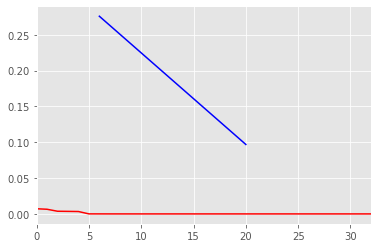

In [6]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
returns1 = dataset_test['poi'][prediction == False]
returns2 = dataset_test['poi'][prediction == True]
pd.Series(returns1).cumprod().plot(color='red')
pd.Series(returns2).cumprod().plot(color='blue')
#pd.Series(seasonal_returns2, index=dates).cumprod().plot(color='blue')

In [7]:
#https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/361723/
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(cf,dataset_test[features], dataset_test['poi'], cv = 10, scoring='precision') 
scores = cross_val_score(cf,dataset_test[features], dataset_test['poi']) 
print(scores.mean())

nan


C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\sklearn\ensemble\_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\sklearn\ensemble\_forest.py", line 558, in _validate_y_class_weight
    check_classification_targets(y)
  File "C:\Users\Richard\anaconda3\envs\finlab\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: 